Problem 3 : Implements a supervised selection of both weights and centers using a two block decomposition method which alternates the minimization with respect to weights and centers.

In [2]:
%matplotlib inline
from numpy import linalg as LA
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from sklearn.metrics import mean_squared_error
from scipy.optimize import minimize
from scipy.optimize import basinhopping
from timeit import default_timer as timer
import matplotlib.pyplot as plt
import scipy as sp
import numpy as np
import time

In [3]:
franke_function = lambda x1,x2 : 0.75*np.exp(((-(9*x1 - 2)**2)/4) - ((9*x2 - 2)**2)/4) \
+ 0.75*np.exp(((-(9*x1 + 1)**2)/49) - (9*x2 + 1)/10) + 0.5*np.exp(((-(9*x1 - 7)**2)/4) \
- ((9*x2 - 3)**2)/4) - 0.2*np.exp(((-(9*x1 - 4)**2) - (9*x2 - 7)**2))

x1 = np.random.uniform(0, 1, 100) 
x2 = np.random.uniform(0, 1, 100)
noise = np.random.uniform(0, 0.1, len(x1)) 
y = franke_function(x1,x2) + noise
x1_train = x1[0:80]
x2_train = x2[0:80]
y_train = y[0:80]

x1_test = x1[80:100]
x2_test = x2[80:100]
y_test = y[80:100]

Below a simple implementation of a decomposition algorithm for RBF networks training (some slides at http:www.dis.uniroma1.it/~palagi/didattica/sites/default/files/allegati/OMML_16-17th_lect_18-19_RBF_decomposition%20methods.pdf)

1) minimization respect to the weights
2) minimization respect to the centers

for every steps we evaluate the norm of the Jacobian (LA.norm(opt_w.jac)) and the value of the objective function (opt_w.fun): 

In [21]:
def DA(function_w,function_c,theta,e1,e2,c,f_w,f_c,N,mu):
    start = timer()
    df = 60
    g = []
    mu = 1
    while df != 1.0e-09:
        x0 = np.zeros(N)
        opt_w = minimize(function_w ,x0,args=(x1_train,x2_train,y_train,c,mu))
        if opt_w.fun <= f_w and LA.norm(opt_w.jac) <= e1 :
            f_w = opt_w.fun
            w = opt_w.x
            e1 = theta*e1
            g.append(LA.norm(opt_w.jac))
            x0 = np.zeros(len(c))
            opt_c = minimize(function_c ,x0,args=(x1_train,x2_train,y_train,w,mu))
            if opt_c.fun <= f_c and LA.norm(opt_c.jac) <= e2:
                f_c = opt_c.fun
                c = opt_c.x
                e2 = theta*e2
                g.append(LA.norm(opt_c.jac))
                df = np.sum(g)
            else:
                end = timer()
                return c,w,(end - start)
            
        else:
            end = timer()
            return c,w,(end - start)
            
        
function_1 = lambda w,x1,x2,y,c,mu: 0.5*(np.sum((w[0] * (np.exp(-1*((x1- c[0])**2 + (x2- c[1])**2)))) - y))**2 + mu * ( LA.norm(c) + w[0] ** 2)
                                      
function_2 = lambda c,x1,x2,y,w,mu: 0.5*(np.sum((w*(np.exp(-1*((x1 - c[0])**2 + (x2 - c[1])**2)))) - y))**2 + mu * ( LA.norm(c) + w ** 2)

c = np.array([0,0])
N = 1
print(DA(function_1,function_2,0.4,10,20,c,300,300,N,1))

(array([0.0040078 , 0.00400775]), array([0.83142542]), 0.06362040000021807)


\vspace{5mm}
How in the prevoius problems we compute the optimization routine for N = 1,2,4 and µ = 0.01,2,20 .
N = 1   µ = 0.01


In [22]:
w = 1.42712608
center = np.array([0.09962725,0.10466565])
estimated_y_N1 = lambda w,center,x1,x2: (w*(np.exp(-1*(np.sqrt((x1-center[0])**2 + (x2-center[1])**2))**2)))

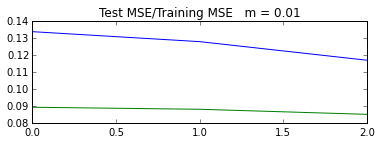

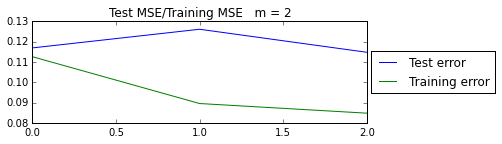

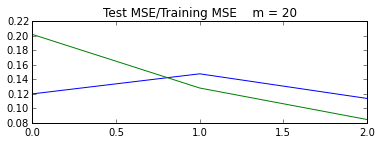

In [112]:
train_err_m01 = [0.0892,0.088,0.085]
test_err_m01 = [0.1339,0.1280,0.117]
train_err_m2 = [0.1126,0.0895,0.08474]
test_err_m2 = [0.1169,0.1261,0.11474]
train_err_m20 = [0.2020,0.1280,0.08451584]
test_err_m20 = [0.1199,0.1476,0.1136]

fig = plt.figure()
ax = fig.add_subplot(211)
ax.plot(test_err_m01)
ax.plot(train_err_m01)
ax.set_title('Test MSE/Training MSE   m = 0.01')
ax.legend(loc='center right', bbox_to_anchor=(1.9, 0.5))

fig = plt.figure()
ax1 = fig.add_subplot(211)
ax1.plot(test_err_m2,label = 'Test error')
ax1.plot(train_err_m2,label = 'Training error')
ax1.legend(loc='center right', bbox_to_anchor=(1.4, 0.5))
ax1.set_title('Test MSE/Training MSE   m = 2')

fig = plt.figure()
ax2 = fig.add_subplot(212)
ax2.plot(test_err_m20)
ax2.plot(train_err_m20)
ax2.legend(loc='center right', bbox_to_anchor=(1.3, 0.5))
ax2.set_title('Test MSE/Training MSE    m = 20')

\vspace{5mm}

In this case we can see that with N = 2 the test error increase and after decrase when N = 4 i think this behaviour can be take as result from a chance but is really clear if we see the left part of all the figure the role of µ.

\vspace{5mm}

I think now we can compare the performance of three type of learning algorithm from two point of view:

1) the test MSE with N = 4 because in unsupervised method we choose the number of the centers with the K-Means K = 4
2) the performance in computational time of all the optimization algorithm ( not for the global optimizatin algorithm BH because it's obviously more slow than the other).

\vspace{5mm}

No handles with labels found to put in legend.
No handles with labels found to put in legend.


Text(0,0.5,'test MSE')

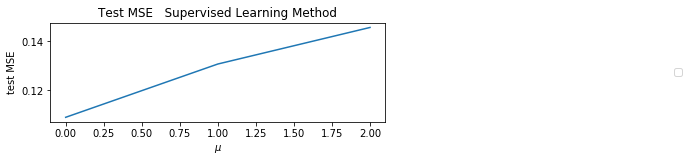

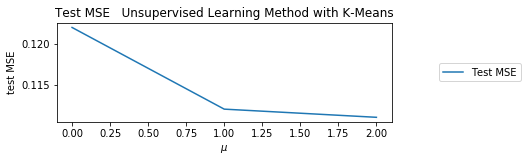

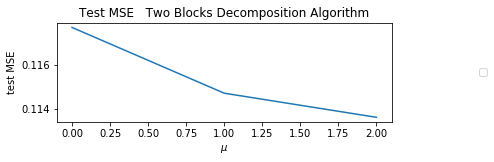

In [28]:
test_err_N4sup = [0.10901801,0.13074456,0.14564664]

test_mse_uns = [0.122, 0.112,0.111]

test_err_dec = [0.1177,0.1147,0.1136]

fig = plt.figure()
ax = fig.add_subplot(211)
ax.plot(test_err_N4sup)
ax.set_title('Test MSE   Supervised Learning Method')
ax.legend(loc='center right', bbox_to_anchor=(1.9, 0.5))
plt.xlabel('$\mu$')
plt.ylabel('test MSE')

fig = plt.figure()
ax1 = fig.add_subplot(211)
ax1.plot(test_mse_uns,label = 'Test MSE')
ax1.legend(loc='center right', bbox_to_anchor=(1.4, 0.5))
ax1.set_title('Test MSE   Unsupervised Learning Method with K-Means')
plt.xlabel('$\mu$')
plt.ylabel('test MSE')

fig = plt.figure()
ax2 = fig.add_subplot(212)
ax2.plot(test_err_dec)
ax2.legend(loc='center right', bbox_to_anchor=(1.3, 0.5))
ax2.set_title('Test MSE   Two Blocks Decomposition Algorithm')
plt.xlabel('$\mu$')
plt.ylabel('test MSE')


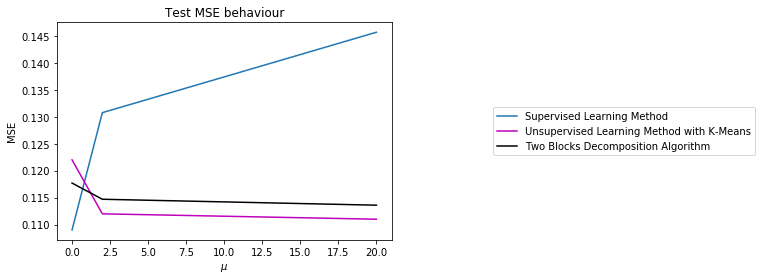

In [30]:
fig.clf()
reg_par = [0.01, 2.0, 20]
plt.plot(reg_par,test_err_N4sup,label='Supervised Learning Method')
plt.plot(reg_par,test_mse_uns,color='m', label='Unsupervised Learning Method with K-Means')
plt.plot(reg_par,test_err_dec,color='k', label='Two Blocks Decomposition Algorithm')
plt.xlabel('$\mu$')
plt.ylabel('MSE')
plt.title('Test MSE behaviour')
plt.legend(loc='center right', bbox_to_anchor=(2.1, 0.5))
plt.show()
plt.close()

The performance in terms of test error of the unsupervised method and the two blocks decomposition algorithm is more or less the same.

Now we compare the performance of the three algorithm in terms of computational time.

1) supervised training with quasi-Newton method (BFGS) and conjugate gradient algorithm (CG-PPR)

2) two blocks decomposition algorithm (DA)


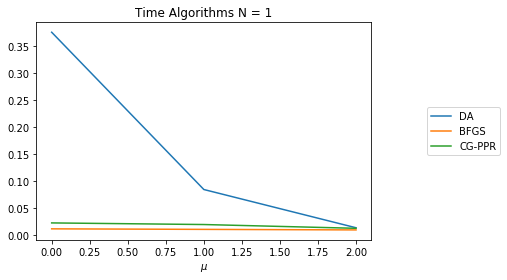

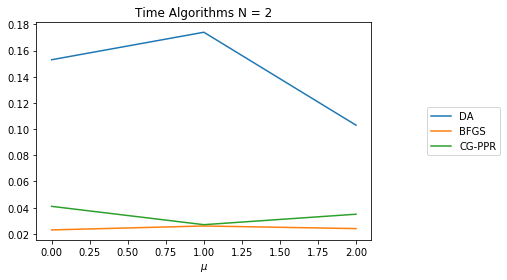

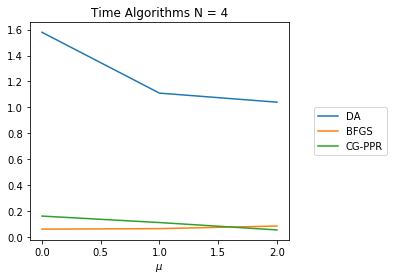

In [31]:
dectimeN1 = [0.376,0.084,0.013]
dectimeN2 = [0.153,0.174,0.103]
dectimeN4 = [1.58,1.11,1.04]

bfgsN1 = [0.011,0.010,0.009]
cgN1 = [0.022,0.019,0.012]


bfgsN2 = [0.023,0.026,0.024]
cgN2 = [0.041,0.027,0.035]


bfgsN4 = [0.059,0.063,0.083]
cgN4 = [0.16,0.11,0.053]


fig = plt.figure()
ax.set_xlabel('common xlabel')
ax.set_ylabel('common ylabel')

ax = fig.add_subplot(111)
ax.plot(dectimeN1,label='DA')
ax.plot(bfgsN1,label='BFGS')
ax.plot(cgN1,label='CG-PPR')
plt.xlabel('$\mu$')
ax.set_title('Time Algorithms N = 1')
ax.legend(loc='center right', bbox_to_anchor=(1.4, 0.5))


fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(dectimeN2,label='DA')
ax1.plot(bfgsN2,label='BFGS')
ax1.plot(cgN2,label = 'CG-PPR')
plt.xlabel('$\mu$')
ax1.legend(loc='center right', bbox_to_anchor=(1.4, 0.5))
ax1.set_title('Time Algorithms N = 2')

fig = plt.figure()
ax2 = fig.add_subplot(111)
ax2.plot(dectimeN4,label='DA')
ax2.plot(bfgsN4,label='BFGS')
ax2.plot(cgN4,label='CG-PPR')
plt.xlabel('$\mu$')
ax2.legend(loc='center right', bbox_to_anchor=(1.4, 0.5))
ax2.set_title('Time Algorithms N = 4')
fig.tight_layout()


The DA it's in average slower than the other two algorithms, because there are many evaluations inside in the main loop but we have seen that for $N = 4$ that the DA generalize the problem much better than the supervised method. 